<a href="https://colab.research.google.com/github/Vegavru/Gr-ficas-examen_TERCER-PARCIAL/blob/main/Sol_num_ec_de_laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a = 1
x = np.arange(0,1.01,0.05)
y = np.arange(0,a+0.01,0.05)
X,Y = np.meshgrid(x,y)

Text(0.5, 0, 'V')

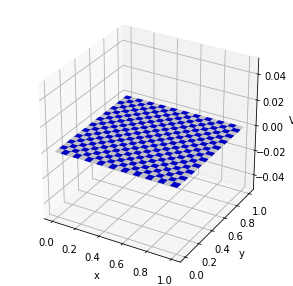

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
colortuple = ('w', 'b')
colors = np.empty(X.shape, dtype=str)
for i in range(len(x)):
  for j in range(len(x)):
    colors[i, j] = colortuple[(i + j) % len(colortuple)]
surf = ax.plot_surface(X, Y, np.zeros(np.shape(X)), rstride=1, cstride=1,facecolors=colors)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V')

Text(0, 0.5, 'y')

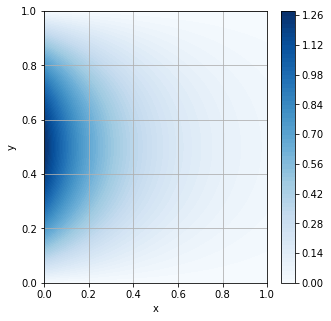

In [ ]:
n=1
a=1
V0 = 1
x = np.arange(0,1.01,0.01)
y = np.arange(0,a+0.01,0.01)
X,Y = np.meshgrid(x,y)
V=(4*V0/np.pi)*(1/n*np.exp(-n*np.pi*X/a)*np.sin(n*np.pi*Y/a))
fig = plt.figure(figsize=(5.,5.))
ax = fig.gca()
cf = ax.contourf(X,Y,V,64,cmap='Blues')
ax.grid()
plt.colorbar(cf)
ax.set_xlabel('x')
ax.set_ylabel('y')


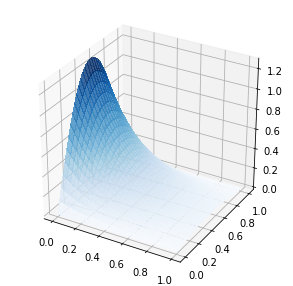

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5.,5.))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, V, cmap='Blues',alpha=0.8,linewidth=0, antialiased=False)

In [ ]:
cset = ax.contour(X, Y, V, zdir='y',offset=1, cmap='Blues',levels=1)
ann = ax.text(.7,.8,1, "n={}".format(n),color='k',fontsize=24)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V')

Text(0.0938581756201286, 0.012574611180235853, 'V')

In [ ]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib.animation as animation

def update_plot(frame_number, zarray, cf):
  cf[0].remove()
  cf[1].remove()
  cf[0] = ax.plot_surface(X, Y, zarray[:,:,frame_number], cmap="Blues")
  cf[1] = ax.text(.7,.8,1, "n={}".format(n_range[frame_number]),color='k',fontsize=24)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n_range = np.arange(1,28,2)
zarray = np.zeros((np.shape(X)[0], np.shape(Y)[1], len(n_range)))
V_n = lambda X,Y,n : (4*V0/np.pi)*(1/n*np.exp(-n*np.pi*X/a)*np.sin(n*np.pi*Y/a))

for i, n in enumerate(n_range):
  zarray[:,:,i] = V_n(X,Y,n) + zarray[:,:,i-1]

cf = []
cf.append(ax.plot_surface(X, Y, zarray[:,:,0], color='0.75'))
cf.append(ax.text(.7,.8,1, "n={}".format('1'), color='k',fontsize=24))
ax.set_zlim(0,1.5)
anim = animation.FuncAnimation(fig,update_plot, len(n_range), fargs=(zarray,cf),interval=400)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V')
plt.close(anim._fig)
HTML(anim.to_html5_video())
